# Qiskit overview: Main Packages



![qiskit_overview](images/qiskit_overview.png)





### Including the Ecosystem:
![ecosystem](images/ecosystem.png)

## The Qiskit Ecosystem

https://qiskit.org/ecosystem

**Three Tiers:**
- Main
- Extensions
- Community

--> You can submit your open-source project to the Ecosystem!

What we'll focus on: mostly Qiskit (Terra)  
If we have time: other packages

# Time for some code! (finally!)


Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [1]:
import numpy as np

# Importing standard Qiskit libraries
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# Additional libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.job import job_monitor


# Loading your IBM Quantum account(s)
# IBMProvider.save_account(token='MY API TOKEN') # overwrite=True
provider = IBMProvider()

## Qiskit submodules we'll be using

- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (`qiskit.circuit`)
- [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (`qiskit.quantum_info`)
- [Qiskit Aer (Simulator)](https://qiskit.org/documentation/aer/)
- [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (`qiskit.visualization`)
- [Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (`qiskit.primitives`)


Other modules: https://qiskit.org/documentation/apidoc/terra.html

In [2]:
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

## Quantum Circuit

Gates are matrices, applying gates is matrix multiplaction

Simplest example - the Bell State

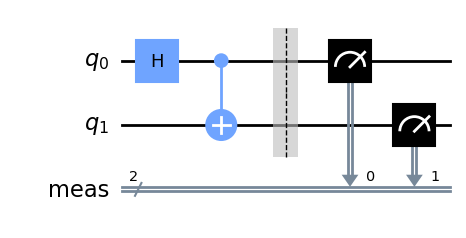

In [4]:
from qiskit import QuantumCircuit

# Initialize quantum circuit
bell = QuantumCircuit(2)

# Apply gates
bell.h(0)
bell.cx(0,1)

# Measure qubits
bell.measure_all()

# Visualise circuit
bell.draw('mpl')


Total count for 00 and 11 are: {'00': 505, '11': 495}


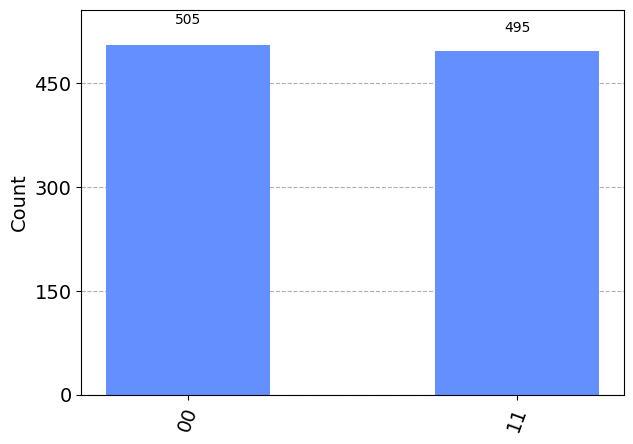

In [5]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
simulator = Aer.get_backend("aer_simulator")
compiled_circuit = transpile(bell, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

C:\ProgramData\Anaconda3\envs\qiskit_test\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


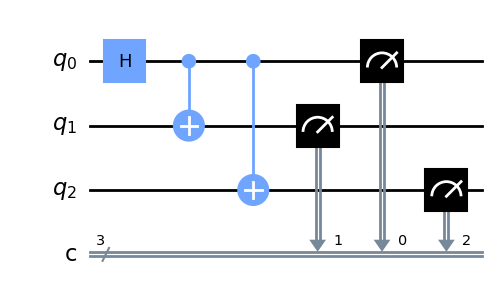

In [6]:
# Exercise: Recreate the circuit as shown above.
ghz = QuantumCircuit(3,3)
# Add a H gate on qubit 0, putting this qubit in superposition.
ghz.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
ghz.cx(0,1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
ghz.cx(0,2)
# Measure qubits
ghz.measure([0,1,2],[0,1,2])


# Draw the circuit
ghz.draw('mpl')


Total count for 000 and 111 are: {'000': 534, '111': 466}


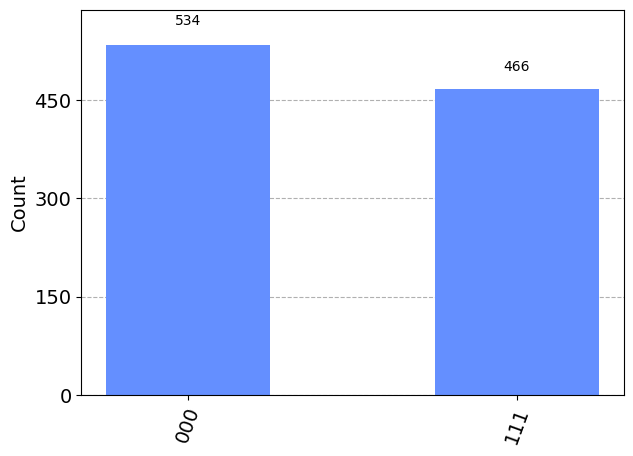

In [7]:
simulator = Aer.get_backend("aer_simulator")
compiled_circuit = transpile(ghz, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:",counts)

# Draw the circuit
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Real Hardware 🎉

In [9]:
from qiskit_ibm_provider import least_busy

backend = least_busy(
    provider.backends(
        simulator=False, filters=lambda b: b.configuration().n_qubits >= 3
    )
)

backend

<IBMBackend('ibm_nairobi')>

C:\ProgramData\Anaconda3\envs\qiskit_test\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


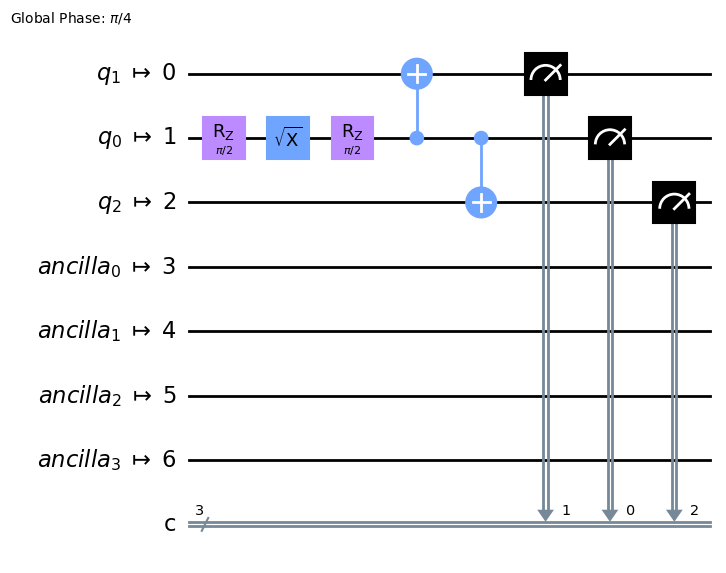

In [10]:
ghz_circuit = transpile(ghz, backend)
ghz_circuit.draw('mpl')

In [11]:
job = backend.run(ghz_circuit)
job_monitor(job)

Job Status: job has successfully run


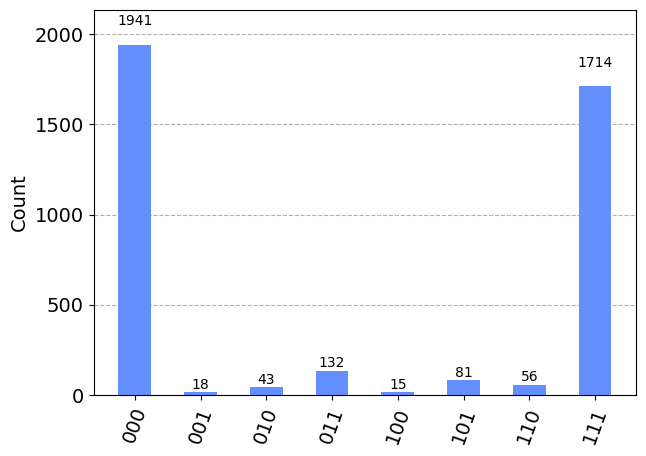

In [12]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# Transpilation

### Overview

Transpilation is the process of rewriting a given input circuit to match the topology of a specific quantum device, and/or to optimize the circuit for execution on present day noisy quantum systems.

Most circuits must undergo a series of transformations that make them compatible with a given target device, and optimize them to reduce the effects of noise on the resulting outcomes. Rewriting quantum circuits to match hardware constraints and optimizing for performance can be far from trivial. The flow of logic in the rewriting tool chain need not be linear, and can often have iterative sub-loops, conditional branches, and other complex behaviors. That being said, the basic building blocks follow the structure given below:



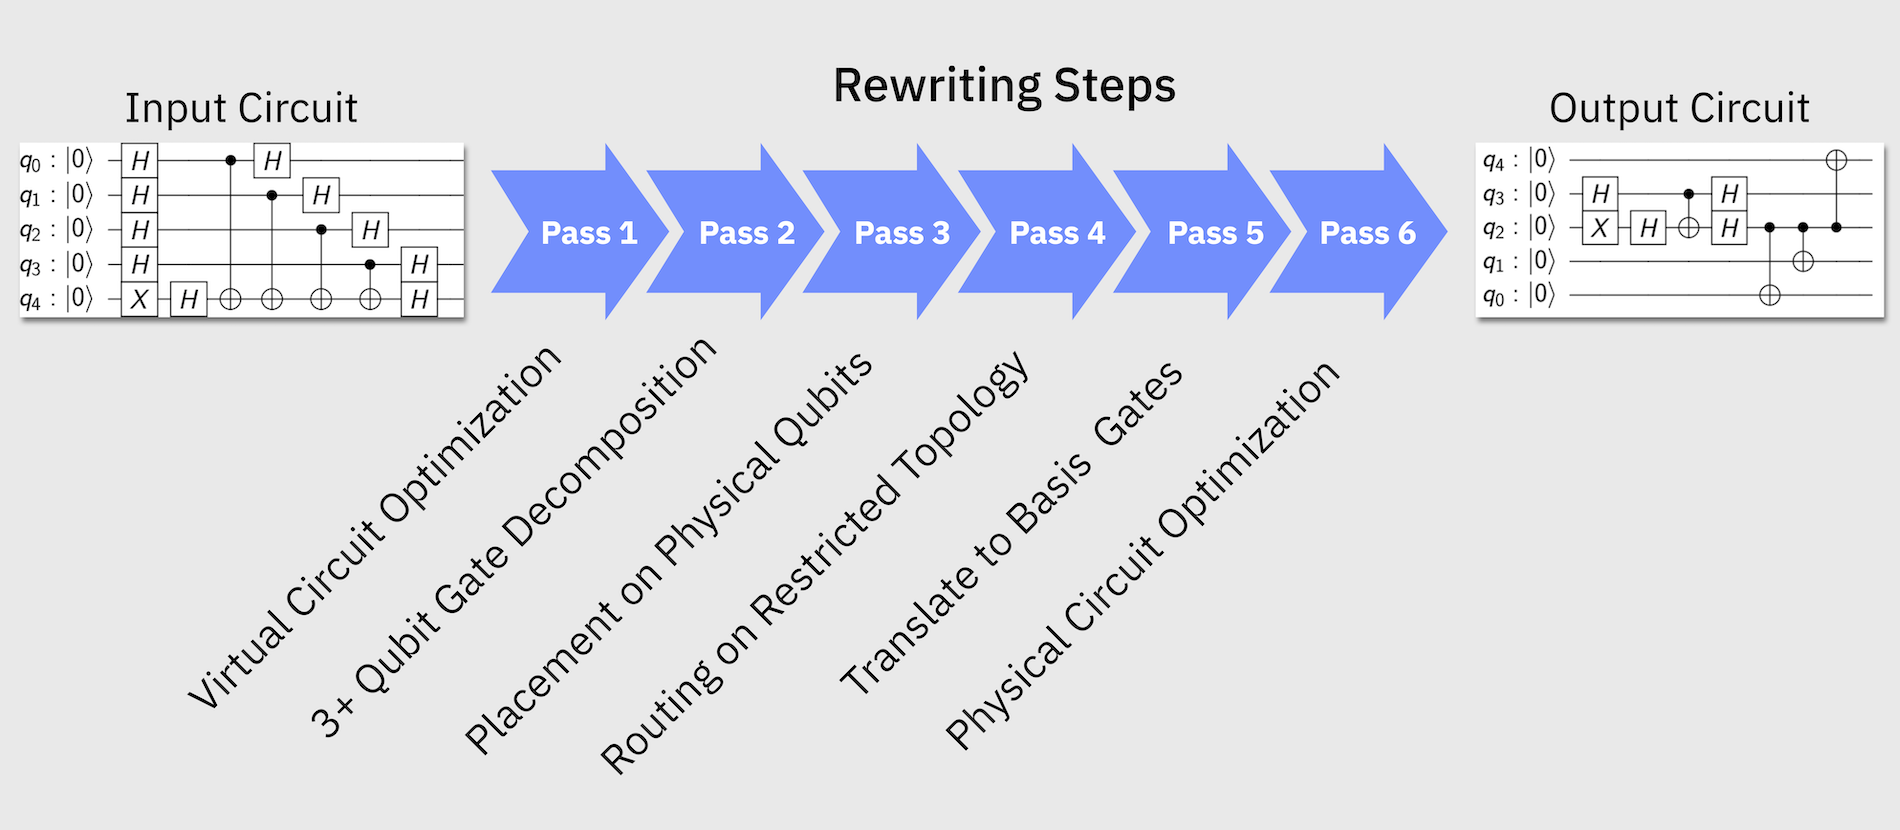

Qiskit has four pre-built transpilation pipelines available here: qiskit.transpiler.preset_passmanagers. Unless the reader is familiar with quantum circuit optimization methods and their usage, it is best to use one of these ready-made routines.

### Supplementary Information

####  Basis gates

When writing a quantum circuit you are free to use any quantum gate (unitary operator) that you like, along with a collection of non-gate operations such as qubit measurements and reset operations. However, when running a circuit on a real quantum device one no longer has this flexibility. Due to limitations in, for example, the physical interactions between qubits, difficulty in implementing multi-qubit gates, control electronics etc, a quantum computing device can only natively support a handful of quantum gates and non-gate operations. In the present case of IBM Q devices, the native gate set can be found by querying the devices themselves, and looking for the corresponding attribute in their configuration:

In [13]:
from qiskit.providers.fake_provider import FakeVigo

backend = FakeVigo()
    
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx']

Every quantum circuit run on an IBM Q device must be expressed using only these basis gates. For example, suppose one wants to run a simple phase estimation circuit:

C:\ProgramData\Anaconda3\envs\qiskit_test\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


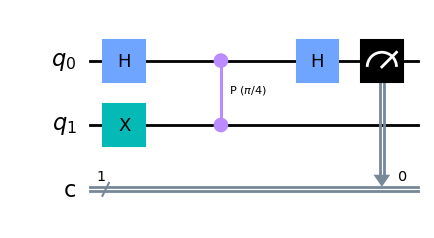

In [14]:
import numpy as np
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.cp(np.pi/4, 0, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw('mpl')

We have`H`, `X`, and controlled-`P` gates, all of which are not in our devices basis gate set, and must be expanded.  This expansion is taken care of for us in the `qiskit.execute` function. However, we can decompose the circuit to show what it would look like in the native gate set of the IBM Quantum devices:

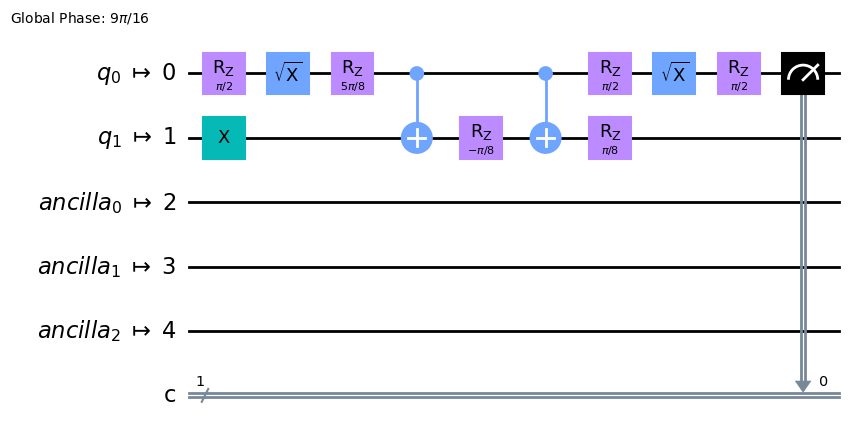

In [15]:
from qiskit import transpile

qc_basis = transpile(qc, backend)
qc_basis.draw(output='mpl')

A few things to highlight. First, the circuit has gotten longer with respect to the initial one. This can be verified by checking the depth of the circuits:

In [16]:
print('Original depth:', qc.depth(), 'Decomposed Depth:', qc_basis.depth())

Original depth: 4 Decomposed Depth: 10


Second, although we had a single controlled gate, the fact that it was not in the basis set means that, when expanded, it requires more than a single cx gate to implement. All said, unrolling to the basis set of gates leads to an increase in the depth of a quantum circuit and the number of gates.

It is important to highlight two special cases:

A SWAP gate is not a native gate on the IBM Q devices, and must be decomposed into three CNOT gates:


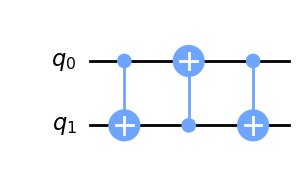

In [17]:
swap_circ = QuantumCircuit(2)
swap_circ.swap(0, 1)
swap_circ.decompose().draw(output='mpl')

As a product of three CNOT gates, SWAP gates are expensive operations to perform on a noisy quantum devices. However, such operations are usually necessary for embedding a circuit into the limited entangling gate connectivities of actual devices. Thus, minimizing the number of SWAP gates in a circuit is a primary goal in the transpilation process.

A Toffoli, or controlled-controlled-not gate (ccx), is a three-qubit gate. Given that our basis gate set includes only single- and two-qubit gates, it is obvious that this gate must be decomposed. This decomposition is quite costly:

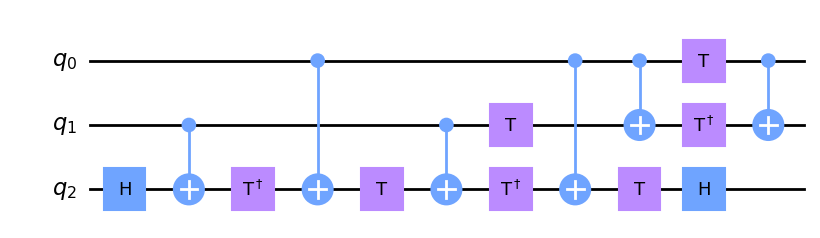

In [18]:
ccx_circ = QuantumCircuit(3)
ccx_circ.ccx(0, 1, 2)
ccx_circ.decompose().draw(output='mpl')